In [ ]:
!pip install tensorflow

In [1]:
#verify the installation
import tensorflow as tf
from tensorflow import keras 

#Check tf.keras version
print(tf.keras.__version__)


2.12.0


In [2]:
# Loading MNIST dataset
mnist = keras.datasets.mnist 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Data Exploration
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

In [5]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784. 
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED) 
X_test = X_test.reshape(10000, RESHAPED) 

# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples') 

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

60000 train samples
10000 test samples


In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_0.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax')) 

In [7]:
# Compiling the model.
model_0.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Training the model. 
training = model_0.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2) 

Epoch 1/70
750/750 [==============================] - 3s 3ms/step - loss: 1.1264 - accuracy: 0.7307 - val_loss: 0.6616 - val_accuracy: 0.8572
Epoch 2/70
750/750 [==============================] - 2s 2ms/step - loss: 0.6094 - accuracy: 0.8561 - val_loss: 0.5092 - val_accuracy: 0.8777
Epoch 3/70
750/750 [==============================] - 2s 2ms/step - loss: 0.5119 - accuracy: 0.8717 - val_loss: 0.4502 - val_accuracy: 0.8874
Epoch 4/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4654 - accuracy: 0.8801 - val_loss: 0.4175 - val_accuracy: 0.8919
Epoch 5/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4367 - accuracy: 0.8851 - val_loss: 0.3961 - val_accuracy: 0.8973
Epoch 6/70
750/750 [==============================] - 3s 3ms/step - loss: 0.4169 - accuracy: 0.8885 - val_loss: 0.3810 - val_accuracy: 0.9003
Epoch 7/70
750/750 [==============================] - 3s 4ms/step - loss: 0.4020 - accuracy: 0.8916 - val_loss: 0.3696 - val_accuracy: 0.9032
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


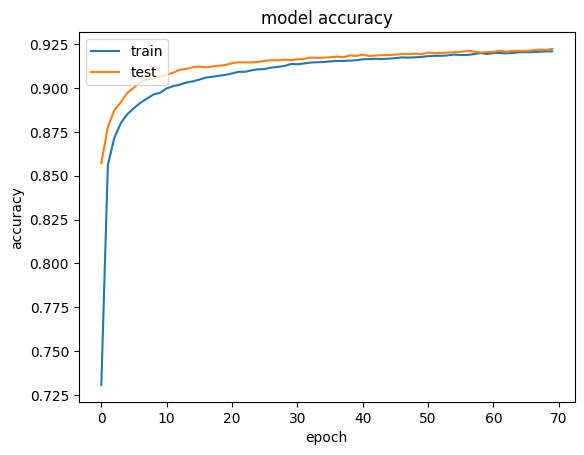

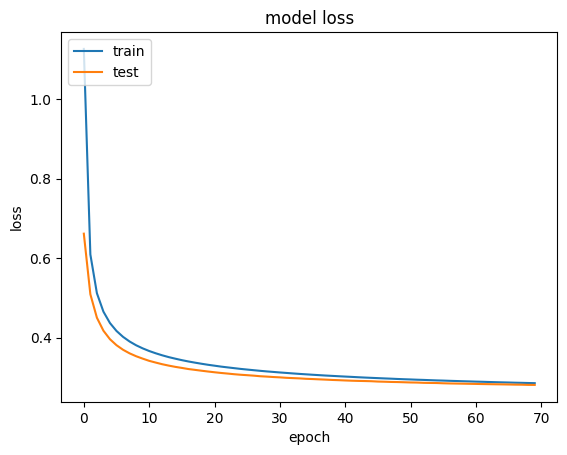

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
#evaluate the model
test_loss, test_acc = model_0.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.2830 - accuracy: 0.9216
Test accuracy: 0.9215999841690063


In [11]:
model_0.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fce57473430>>

In [12]:
model_0.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [13]:
#Most common type of model is a stack of layers
model_1 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_1.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
model_1.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_1.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [14]:
#Most common type of model is a stack of layers
model_1 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_1.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
model_1.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_1.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [15]:
# Compiling the model.
model_1.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Training the model. 
training = model_1.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2) 

Epoch 1/100
750/750 [==============================] - 3s 3ms/step - loss: 1.1455 - accuracy: 0.6857 - val_loss: 0.5025 - val_accuracy: 0.8743
Epoch 2/100
750/750 [==============================] - 3s 4ms/step - loss: 0.4394 - accuracy: 0.8817 - val_loss: 0.3547 - val_accuracy: 0.9024
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 0.3530 - accuracy: 0.8997 - val_loss: 0.3115 - val_accuracy: 0.9124
Epoch 4/100
750/750 [==============================] - 2s 3ms/step - loss: 0.3149 - accuracy: 0.9104 - val_loss: 0.2855 - val_accuracy: 0.9187
Epoch 5/100
750/750 [==============================] - 2s 3ms/step - loss: 0.2897 - accuracy: 0.9174 - val_loss: 0.2640 - val_accuracy: 0.9233
Epoch 6/100
750/750 [==============================] - 2s 3ms/step - loss: 0.2699 - accuracy: 0.9226 - val_loss: 0.2494 - val_accuracy: 0.9287
Epoch 7/100
750/750 [==============================] - 3s 4ms/step - loss: 0.2535 - accuracy: 0.9275 - val_loss: 0.2361 - val_accuracy: 0.9327

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


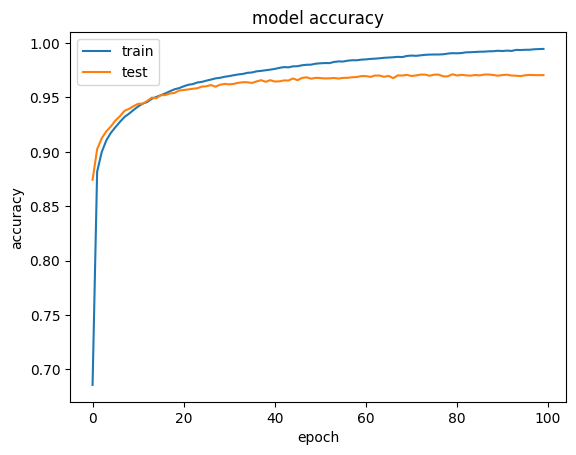

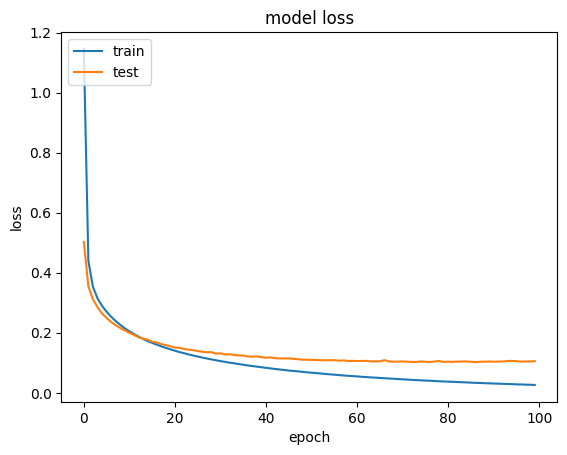

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0947 - accuracy: 0.9718
Test accuracy: 0.9718000292778015


In [19]:
model_1.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fcdc366f4c0>>

In [20]:
model_1.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[-4.1943178e-02, -7.3633477e-02,  6.8137340e-02, ...,
          1.1471629e-02, -4.6105087e-02, -8.3049312e-02],
        [-2.5015224e-02, -1.7335907e-02, -6.8998799e-02, ...,
          4.5882262e-02, -2.6359975e-02,  3.7427261e-02],
        [-7.9923071e-02,  5.2518971e-02, -2.6970062e-02, ...,
         -4.0848047e-02,  6.4242117e-02,  5.9925020e-05],
        ...,
        [-6.9406614e-02, -7.2035030e-02, -3.4789000e-02, ...,
         -1.9511059e-03, -4.1873168e-02, -1.6663656e-02],
        [ 4.3006606e-02,  7.8797065e-02, -7.9268508e-02, ...,
          6.9878943e-02, -3.7318908e-02,  1.5352733e-02],
        [ 2.9064104e-02,  4.9930066e-04,  2.1302722e-02, ...,
          4.6188749e-02,  2.8141439e-03, -1.8621199e-02]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.00175013, -0.01225282, -0.01451912, -0.00404243,  0.00474167,
         0.08650024, -0.03004927